<a href="https://colab.research.google.com/github/AVANTHIREDDY1214/CODSOFT.3/blob/main/customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Shape: (10000, 14)
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826

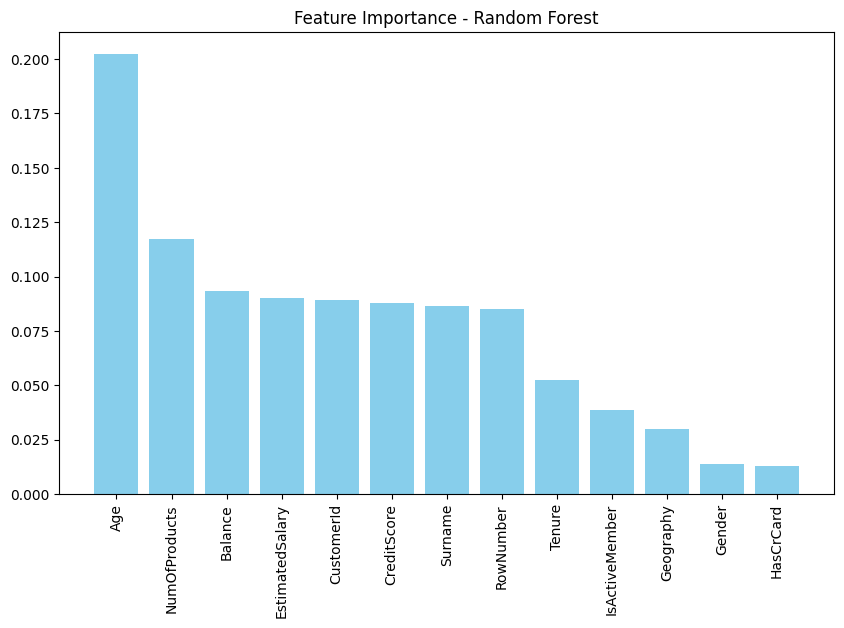

In [3]:
# ======================================================
# Customer Churn Prediction - Full End-to-End Pipeline
# ======================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


# ======================================================
# 1. Load Data
# ======================================================

# Replace with your dataset path
df = pd.read_csv("Churn_Modelling.csv")

print("Dataset Shape:", df.shape)
print(df.head())


# ======================================================
# 2. Data Preprocessing
# ======================================================

# Encode categorical variables
categorical_cols = df.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Target variable: churn (make sure dataset has it)
# Correct column name is 'Exited' instead of 'churn'
X = df.drop("Exited", axis=1)
y = df["Exited"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# ======================================================
# 3. Logistic Regression
# ======================================================

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)
print("\n--- Logistic Regression ---")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]))


# ======================================================
# 4. Random Forest
# ======================================================

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("\n--- Random Forest ---")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))


# ======================================================
# 5. Gradient Boosting
# ======================================================

gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)
print("\n--- Gradient Boosting ---")
print(classification_report(y_test, y_pred_gb))
print("ROC-AUC:", roc_auc_score(y_test, gb.predict_proba(X_test)[:, 1]))


# ======================================================
# 6. Feature Importance (Random Forest)
# ======================================================

importances = rf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], color="skyblue")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.title("Feature Importance - Random Forest")
plt.show()